# Data Preprocessing: Dimensionality Reduction

This notebook show some of the dimensionality reduction algorithms explained in the course.

The main libraries used are scikit learn and kemlglearn

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from kemlglearn.feature_selection.unsupervised import LaplacianScore

from kemlglearn.datasets import make_blobs
from sklearn.datasets import make_moons


iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

## Dimensionality Reduction - Linear: PCA

We bill begin with PCA and the iris dataset. Given that the clusters in this dataset are linearly separable, this kind of transformation will allow to represent the clusters in the data given enough components.

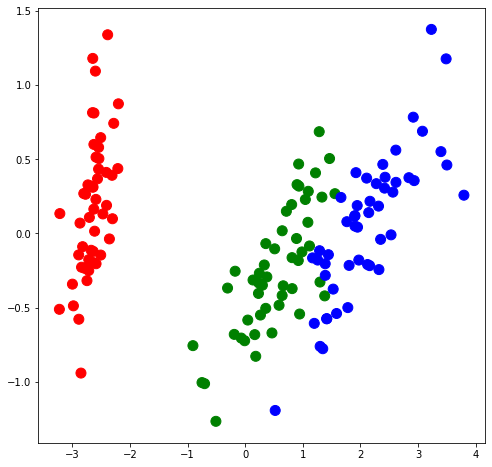

In [3]:
pca = PCA()
pdata = pca.fit_transform(iris['data'])

i=0 
j=1

fig = plt.figure(figsize=(8,8))
plt.scatter(pdata[:, i], pdata[:, j], c=lc,s=100);

Looking at the variance explained by each component, we can see that the first one has most of the variance and the two first components explains almost 98%, so only this components would be necessary and the 2D visualization of the data will represents very closely the original data. 

In [4]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


## Dimensionality Reduction - non Linear: Kernel PCA

Even when a linear transformation is enough for the iris data we can check what happens when non linear transformations are applied, we will start with Kernel PCA applying RBF kernel and different degrees polynomial kernels


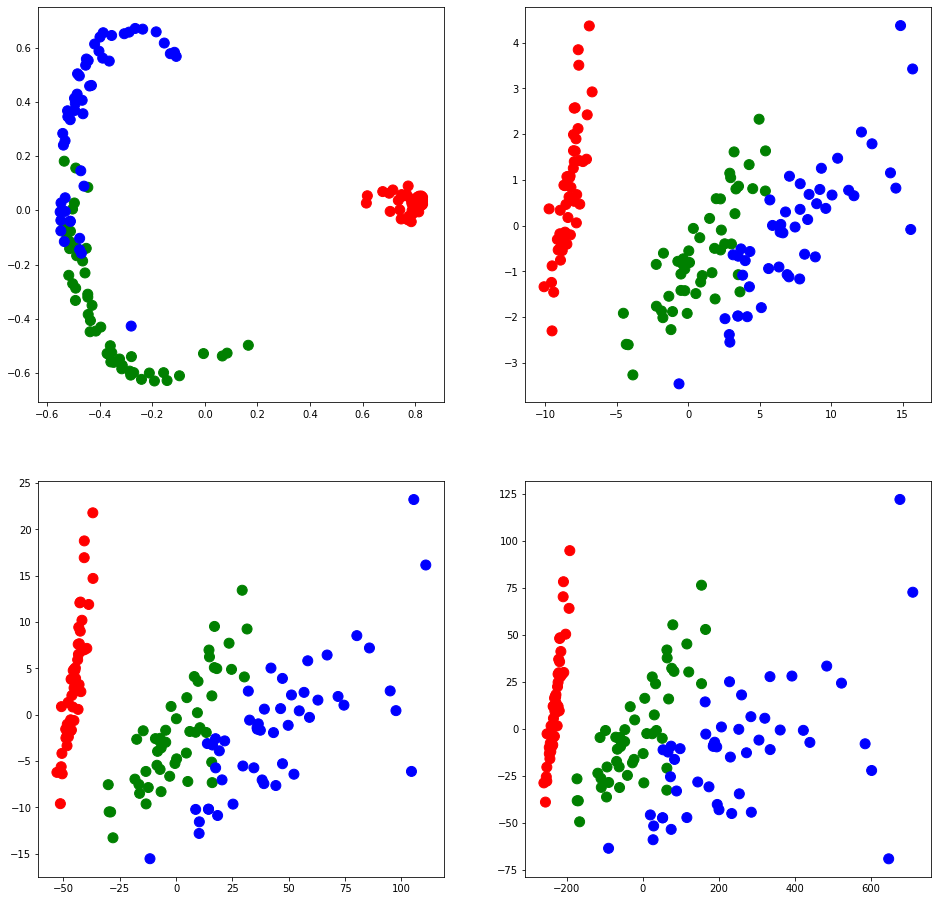

In [5]:
kernel=['rbf', 'poly', 'poly', 'poly']
degree=[1, 2,3,4]

fig = plt.figure(figsize=(16,16))
for i, (k, d) in enumerate(zip(kernel, degree)):
    ax = fig.add_subplot(2,2,i+1)
    kpca = KernelPCA(n_components=2, kernel=k, degree=d)
    kpdata = kpca.fit_transform(iris['data'])
    plt.scatter(kpdata[:, 0], kpdata[:, 1], c=lc,s=100);

As we can see polynomial kernels do not results in a much different representation of the data apart from putting closer the groups as the degree increases. The RBF kernel does a poor job maintaining the separability of the green and blue classes, sometimes to apply a nonlinear transformation can change some of the relations among the examples

## Dimensionality Reduction - non Linear: ISOMAP

ISOMAP is also a nonlinear transformation but the final representation will depend on the number of neighbors used to compute the distance graph as we can see

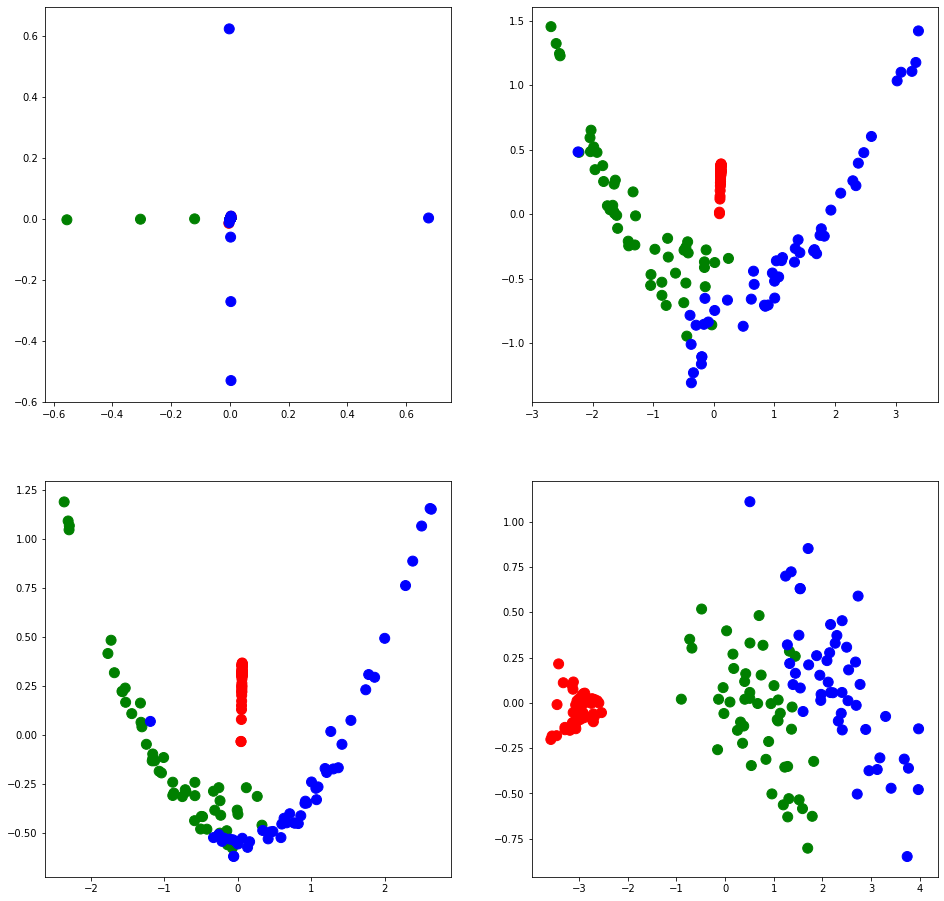

In [9]:
nneigh=[1, 5, 21, 41]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    ax = fig.add_subplot(2,2,i+1)
    iso = Isomap(n_components=2, n_neighbors=nn)
    isdata = iso.fit_transform(iris['data'])
    plt.scatter(isdata[:, 0], isdata[:, 1], c=lc,s=100);

Increasing the number of components can give more freedon to the algorithm to allocate the local densities

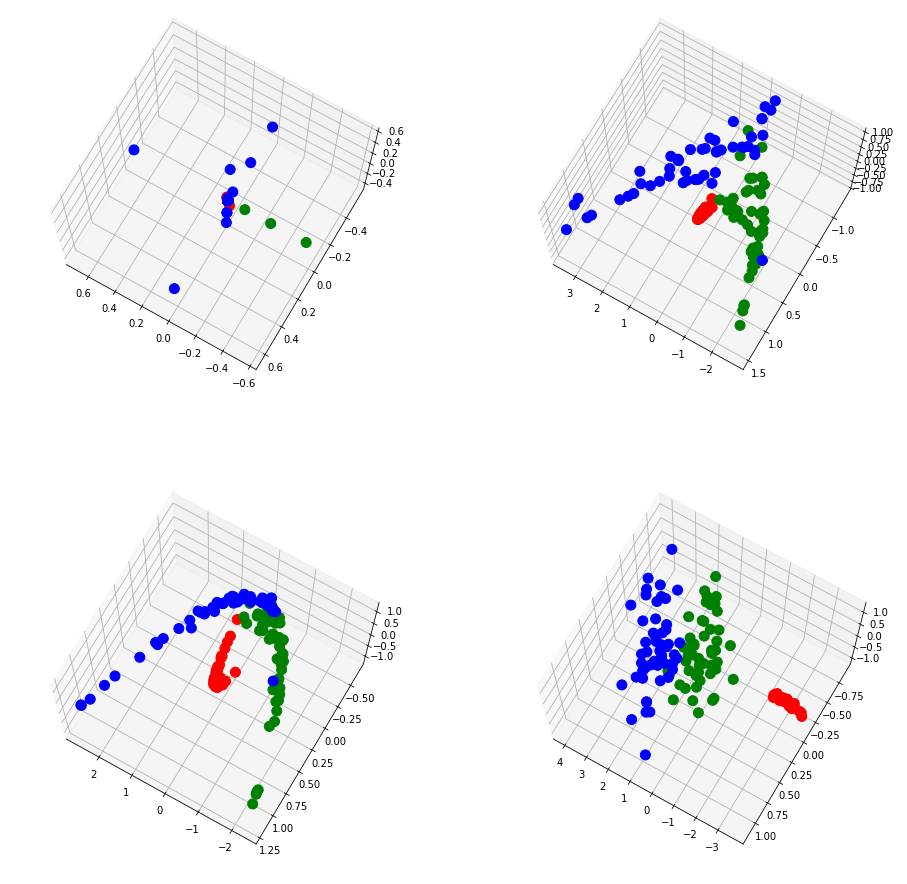

In [16]:
nneigh=[1, 5, 21, 41]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    iso = Isomap(n_components=3, n_neighbors=nn)
    is3data = iso.fit_transform(iris['data'])
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    ax.view_init(75, 120)
    plt.scatter(is3data[:, 0], is3data[:, 1], zs=is3data[:, 2], depthshade=False, c=lc,s=100);

## Dimensionality Reduction - non Linear: LLE

LLE uses the local reconstruction and results in a very different representation than ISOMAP, also the number of neighbors have an impact in the results and we can see that the reconstruction error increases with the number of neighbors.

Rec Error 1 = -1.9398994837153526e-15
Rec Error 5 = 6.64141999862308e-08
Rec Error 21 = 4.32160669278962e-06
Rec Error 41 = 1.856705373382415e-05


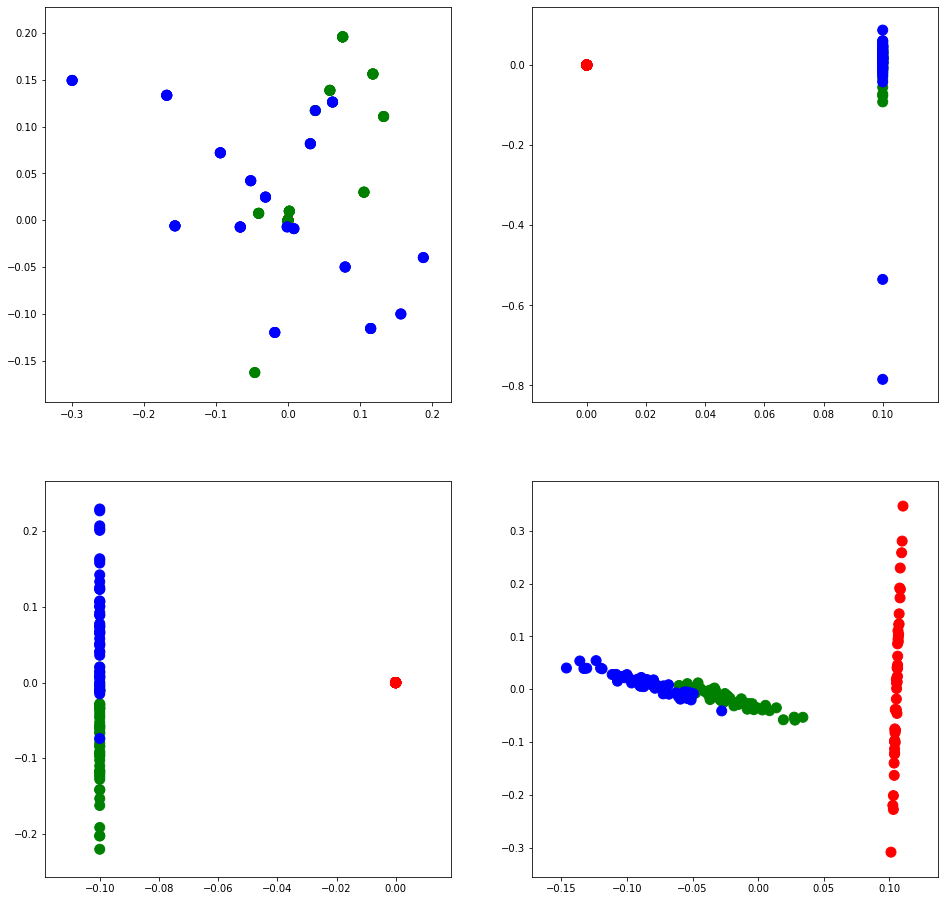

In [19]:
nneigh=[1, 5, 21, 41]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard')
    lldata = lle.fit_transform(iris['data'])
    ax = fig.add_subplot(2,2,i+1)
    print (f'Rec Error {nn} = {lle.reconstruction_error_}')
    plt.scatter(lldata[:, 0], lldata[:, 1], c=lc,s=100);

Also the number of dimensions can help to allocate better the local densities

Rec Error 1 = -2.909849225573029e-15
Rec Error 5 = 3.9929057486997154e-07
Rec Error 21 = 1.9555346351080484e-05
Rec Error 41 = 5.458704754399268e-05


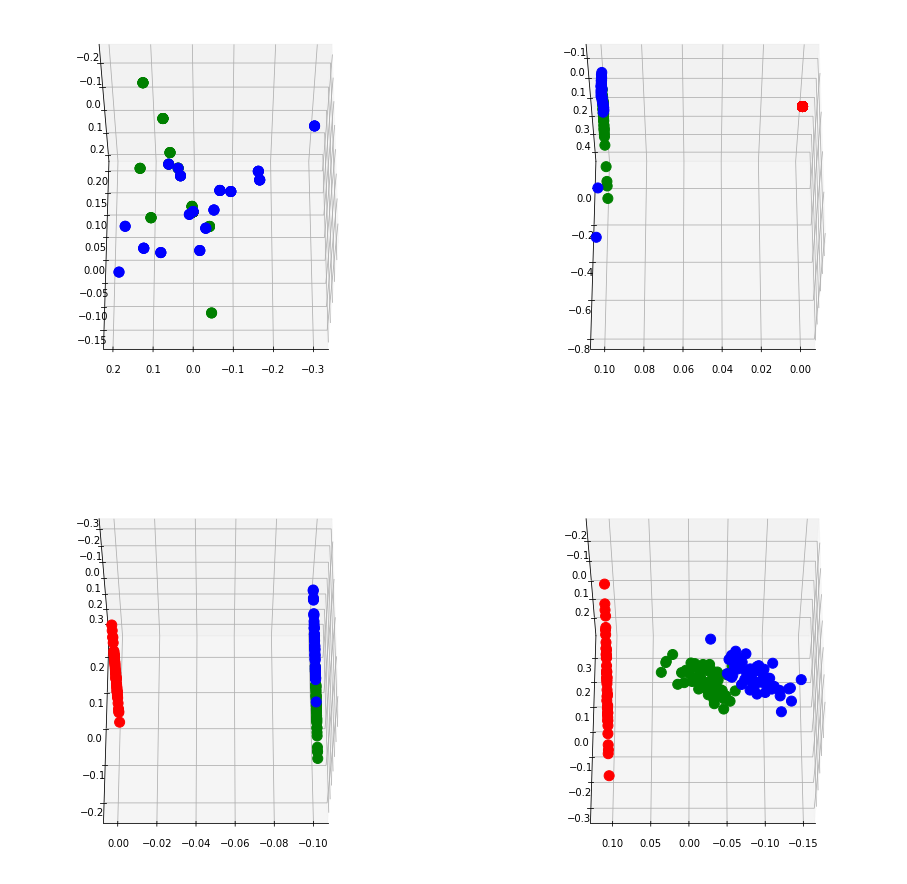

In [20]:
nneigh=[1, 5, 21, 41]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
    ll3data = lle.fit_transform(iris['data'])
    print (f'Rec Error {nn} = {lle.reconstruction_error_}')
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    ax.view_init(240, 90)
    plt.scatter(ll3data[:, 0], ll3data[:, 1], zs=ll3data[:, 2], depthshade=False, c=lc,s=100);

## Feature Selection: Laplacian Score

Unsupervised feature selection is a more difficul task, Laplacian Score measures how the different original dimensions contribute to the local densities and returns a score proportional to that contribution.

Laplacian Score 1= [0.06905246 0.24742775 0.03309567 0.0538684 ]
Laplacian Score 5= [0.13637993 0.39333255 0.05770985 0.05221089]
Laplacian Score 21= [0.36486037 0.59757257 0.14479276 0.06950606]
Laplacian Score 41= [0.49181376 0.7508564  0.21223769 0.18608088]


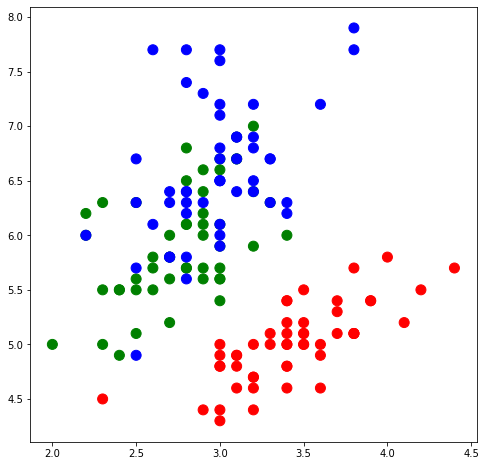

In [22]:
nneigh=[1, 5, 21, 41]
      

for i, nn in enumerate(nneigh):
    lap = LaplacianScore(n_neighbors=nn, bandwidth=0.1, k=2)
    irissel = lap.fit_transform(iris['data'])
    print (f'Laplacian Score {nn}= {lap.scores_}')
fig = plt.figure(figsize=(8,8))    
plt.scatter(irissel[:, 0], irissel[:, 1], c=lc,s=100);

As we can see always there is a variable that has the larger contribution, the second one, followed by the first one. In this case we can see that these two variables do not do the best job separating the clusters, it would be a better idea to apply other method that takes in account the contribution of all the variabes in a new space of reduced dimensionality.

## Linear data

Now we are going to use some artificial datasets to see the effect of linear and non linear dimensionality reduction algorithms.

The first one consists of three spherical blobs with different variances.

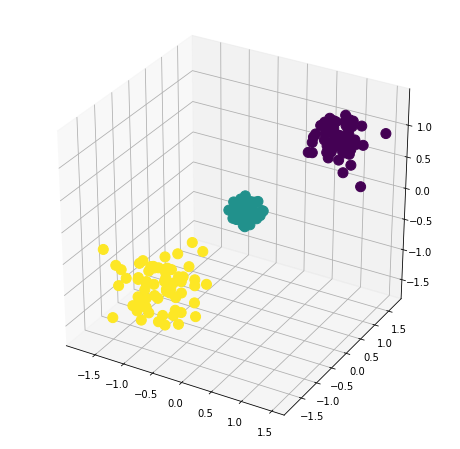

In [2]:
blobs, labels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=labels, s=100);

Computing PCA we can see that just one component explains almost all the variance.

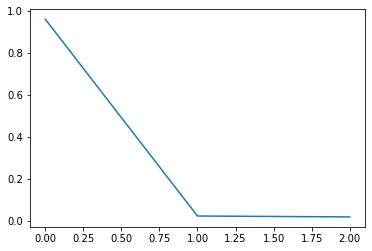

In [3]:
pca = PCA()
fdata = pca.fit_transform(blobs)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And as we can expect representing the PCA transformed data we can see that just one dimension is enough

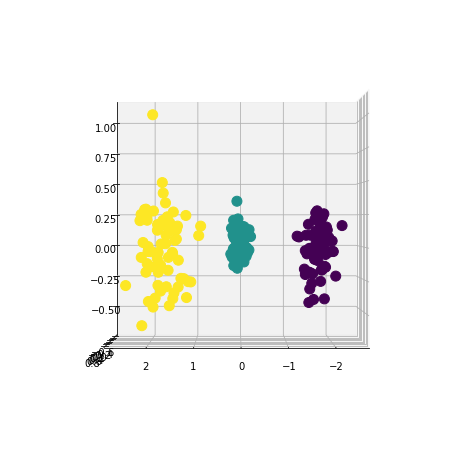

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=labels,s=100);

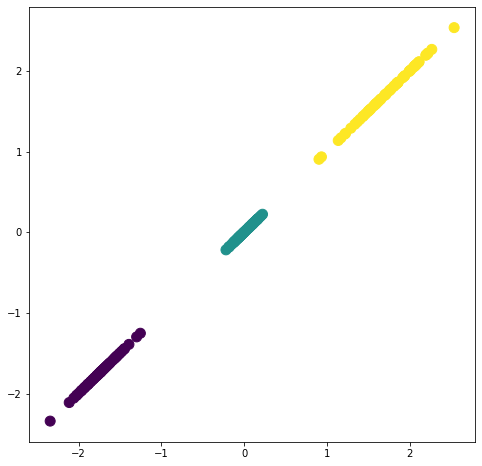

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 0], c=labels,s=100);

Using nonlinear transformations to linearly separable data sometimes has weird consequences.

First we see what happens using ISOMAP

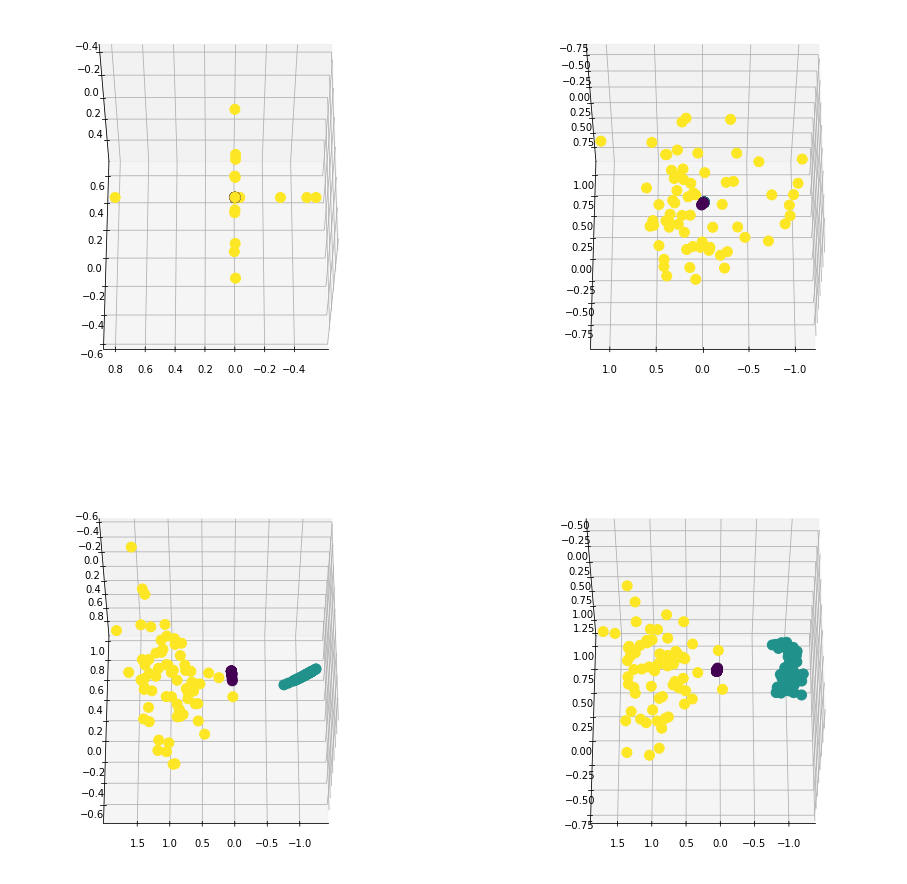

In [19]:
nneigh=[1, 5, 17, 21]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):

    iso = Isomap(n_components=3, n_neighbors=nn)
    fdata = iso.fit_transform(blobs)
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    ax.view_init(240, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

Changing the number of neigbors can change radically the result, but as they increase the transformation is equivalent to PCA

Now for Locally Linear Embedding

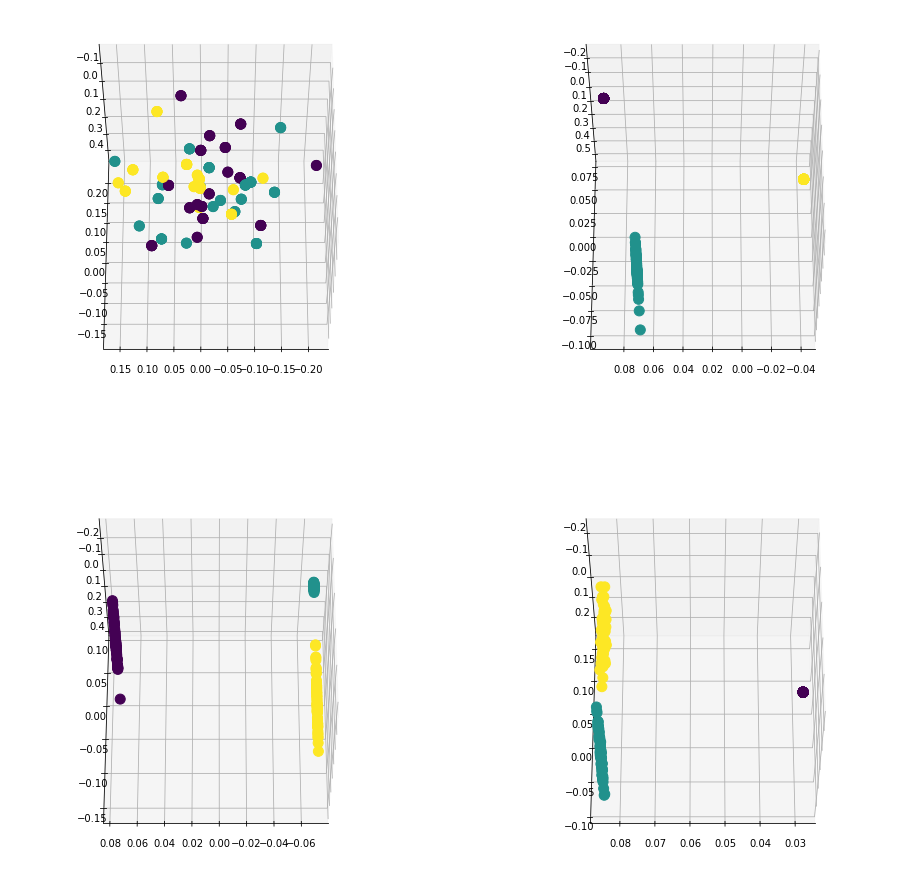

In [21]:
nneigh=[1, 5, 17, 21]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
    fdata = lle.fit_transform(blobs)
    ax = fig.add_subplot(2,2,i+1, projection='3d')
    ax.view_init(240, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

## Nonlinear data

Now we will play with non linearly separable data. First the two moons dataset.

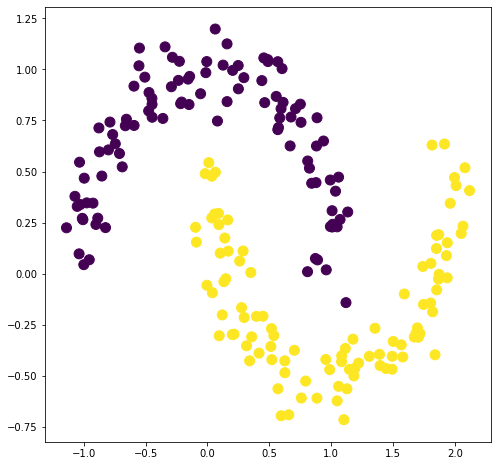

In [8]:
moons, labelsm = make_moons(n_samples=200, noise=0.1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=labelsm, s=100);

PCA assigns most of the variance to the fist component, but the second one has still a significant amount

[0.80623034 0.19376966]


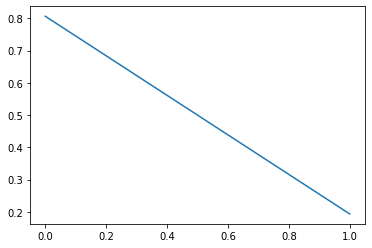

In [9]:
pca = PCA()
fdata = pca.fit_transform(moons)
print(pca.explained_variance_ratio_)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And PCA does not seems to have much effect on the data

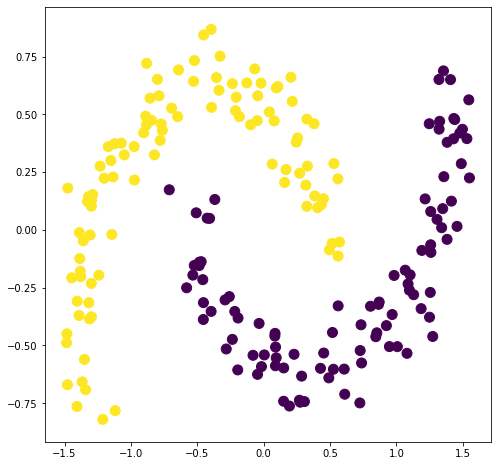

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm,s=100);

ISOMAP does a better job, but adjusting an adequate of neighbors to sparate the two moons requires some experimentation. Playing with the number of neighbors will results on different shapes that will converge on the original data for large values

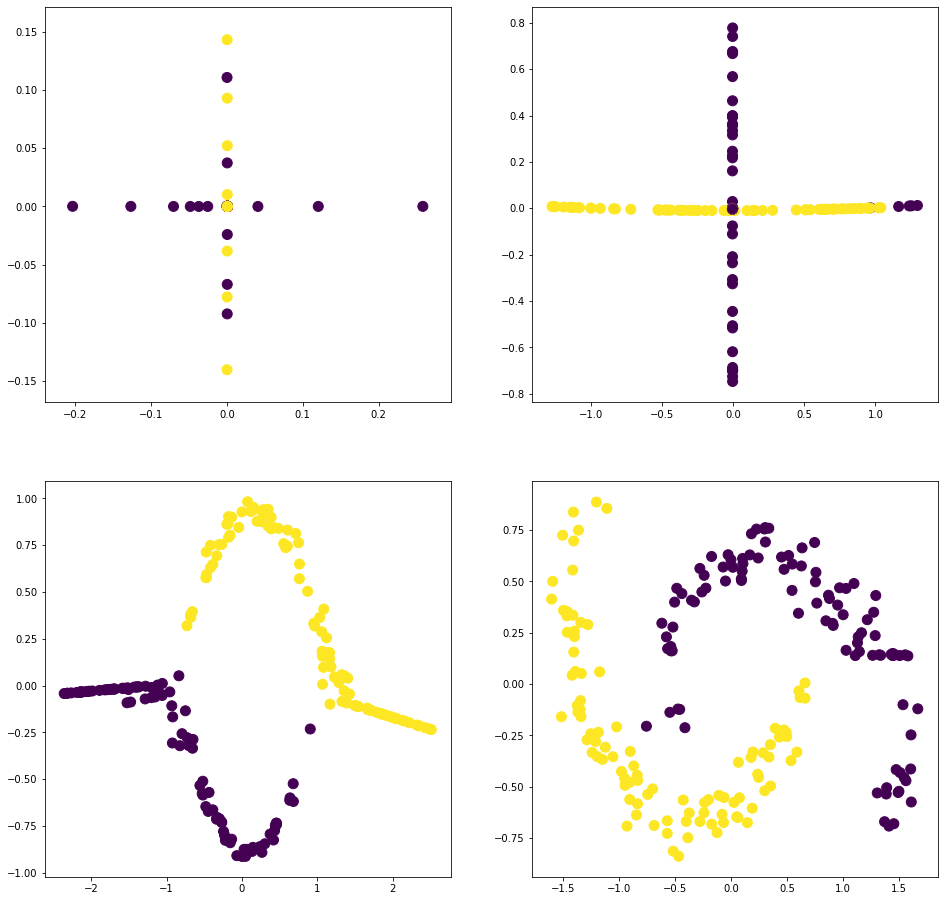

In [32]:
nneigh=[1, 3, 7, 33]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    iso = Isomap(n_components=2, n_neighbors= nn)
    fdata = iso.fit_transform(moons)
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm, s=100);

LLE also allows  separating both moons resulting in very different transformations depending on the number of neighbors.

Reconstriction error 1 = -4.473884416107235e-15
Reconstriction error 3 = 1.0634338021225717e-14
Reconstriction error 7 = 2.0140780020982747e-08
Reconstriction error 23 = 1.854073316252847e-06


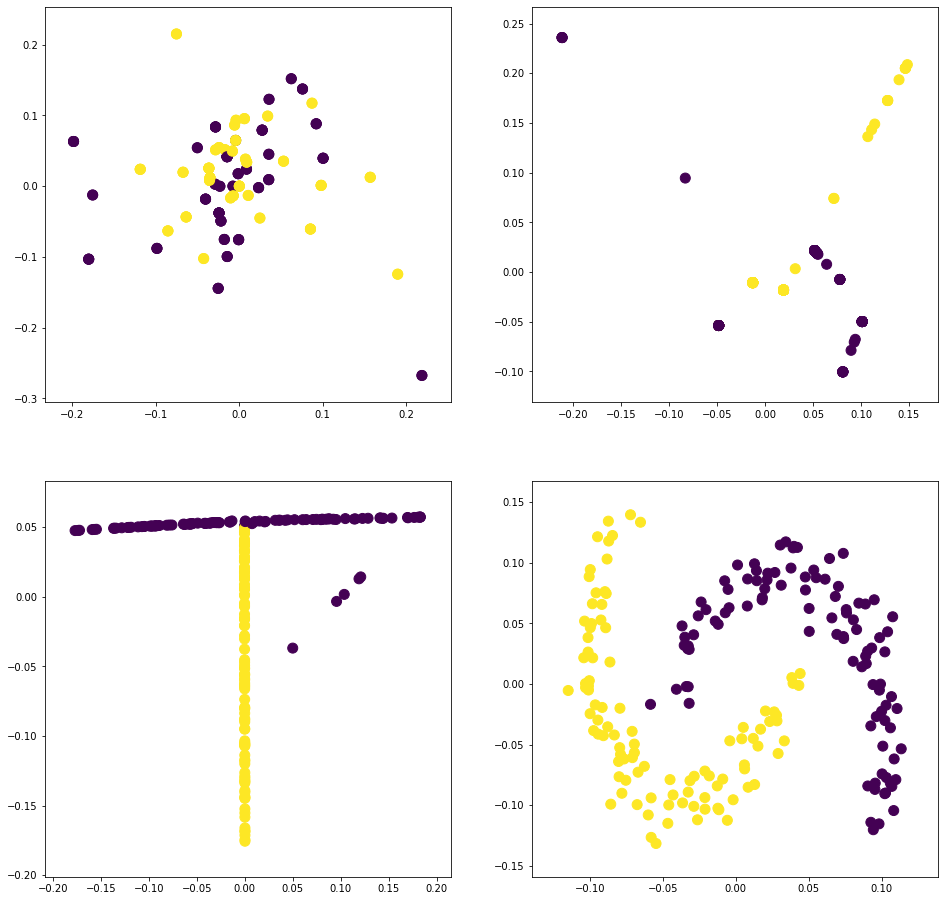

In [31]:
nneigh=[1, 3, 7, 23]
      
fig = plt.figure(figsize=(16,16))    
for i, nn in enumerate(nneigh):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard', random_state=0)
    fdata = lle.fit_transform(moons)
    print (f'Reconstriction error {nn} = {lle.reconstruction_error_}')
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(fdata[:, 0], fdata[:, 1],  c=labelsm, s=100);